# 1. házi feladat

Az első házi feladat során egy egyszerű Multi-layer Perceptron (MLP) típusú neuronhálót kell betanítani és kiértékelni egy regressziós és egy klasszifikációs feladaton a PyTorch könyvtár segítségével.

A házi feladat több részfeladatból áll (A - I), melyek egymásra épülnek. A feladat automatikus tesztelőszkripttel rendelkezik és vizsgálja az egyes részfeladatokra adott megoldások helyességét. Éppen ezért, **ne változtasd meg a notebook struktúráját**, ne szedd több részre, illetve ne módosítsd a megírt részeket, csak a megoldásaidat írd be a megfelelő helyre, különben nem fogjuk tudni értékelni! A megoldások az `# Implement your solution BELOW` és `# Implement your solution ABOVE` sorok közé írandók. Ha a megoldott részfeladatok futtatásakor a "Tester: .... OK" felirat megjelenik, _vélhetően_ jó a megoldás. Azonban, a tesztelőszkript nem képes a megoldás helyességét minden aspektus szerint ellenőrizni. Így elképzelhető, hogy beadás után további javításokat kérünk a megoldásban. A beadott házi feladatok gépi tanulás alapú plágiumellenőrzésen esnek át. Másolás gyanújának felmerülése esetén mind a másolat(ok), mind az azt/azokat ihlető eredeti megoldások visszautasíthatók.

**!!! A feladatok megoldását, vagy az arra mutató linkeket bárhol közzétenni tilos !!!**

Elakadás esetén javasolt átnézni a Canvason megosztott segédanyag notebookokat és az előadások anyagát. A Canvas fórumon "HF1 GYIK" névvel, a gyakori kérdéseket és válaszokat gyűjtjük össze. Továbbá, kérhető segítség az oktatóktól is, például a Teams rendszeren keresztül. Ehhez, kérjük a kurzus Canvas oldalán a legfelső modulban található _"
Teams beszélgetés indítása az oktatókkal"_ linket használni: ez egy Teams beszélgetést kezdeményez az összes oktatóval egyidejűleg.

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Jupyter notebook a Google Drive-on keresztül lett megosztva, így a Google saját Jupyter notebook szerkesztője és futtatókörnyezete nyílik meg a linkre kattintáskor, a Google Colab. Ennek segítségével online szerkeszthető és futtatható a megosztott notebook. Mivel a notebook csak "view" jogosultságokkal van megosztva, a Google Colab az úgynevezett "Playground" módban nyitja azt meg, ahol bár szerkeszthető és futtatható a notebook, de a változtatások nem lesznek automatikusan mentve. A notebook maradandó hatásokkal járó szerkesztése az alábbi módokon lehetséges:
- Ha online szeretnénk a notebookot szerkeszteni és futtatni a Google Colab segítségével, akkor le kell másolni azt a saját Drive tárhelyre (Google Colab file menü -> Save a copy to Drive), majd a másolatot kell megnyitni szerkesztésre.
- A notebook le is tölthető és saját számítógépen is szerkeszthető / futtatható. Ehhez Python környezet megléte szükséges, valamint a notebookban importált Python csomagok és a `jupyterlab`, vagy `notebook` (https://jupyter.org/install) csomag telepítése szükséges a Python disztribúciónk csomagkezelőjével (`pip`, `conda`, stb.).

A kész megoldást tartalmazó notebookot (.ipynb) fájlként kell feltölteni a Canvas-ban, a házi feladat beadási felületén.
**Kérjük a notebook szerkezetét nem módosítani és nem szétszedni külön feladatok szerint!**

**Határidő:** 2023. március 30., szombat, 23:59.

**Késve legkésőbb leadható:** 2023. április 5., péntek, 23:59. - **Ezt követően pótlásra és/vagy javításra nincs lehetőség, ezáltal jegyszerzésre sem. !!!**

**Értékelés:** A házi feladat helyes megoldása és oktatók által történő elfogadása feltétele a jegyszerzésnek. A házi feladat minősége részletesen pontozásra nem kerül, az értékelése kétfokozatú: megfelelt / nem felelt meg. Az első határidőig leadott nagyrészt helyes és nagyrészt teljes ("megfelelt") megoldásért 10 pont jár. Késés esetén ez elveszik.

**Kikötés:** Ahol csak lehet, hatékony, vektorizált megoldásokat várunk. További részletekért lásd: Canvas, HF1 GYIK fórum, "Használhatók-e Python ciklusok?" bejegyzés.

Tesztelő szkript letöltése, importok.

In [1]:
# Download tester
!rm annbsc24_p1_hw1_tester.py
!wget https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/annbsc24_p1_hw1_tester.py

import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

from annbsc24_p1_hw1_tester import Tester

rm: cannot remove 'annbsc24_p1_hw1_tester.py': No such file or directory
--2024-03-21 19:00:33--  https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc24_p1/files/annbsc24_p1_hw1_tester.py
Resolving nipg12.inf.elte.hu (nipg12.inf.elte.hu)... 157.181.160.172
Connecting to nipg12.inf.elte.hu (nipg12.inf.elte.hu)|157.181.160.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14778 (14K)
Saving to: ‘annbsc24_p1_hw1_tester.py’

annbsc24_p1_hw1_tes 100%[===================>]  14.43K  --.-KB/s    in 0.1s    

2024-03-21 19:00:34 (114 KB/s) - ‘annbsc24_p1_hw1_tester.py’ saved [14778/14778]



###**A**: Az adatbázis betöltése

**Információ az adatbázisról**:
Az adatbázis az UCI Machine Learning Repository-ról származik (http://archive.ics.uci.edu/ml/datasets/Student+Performance). Két portugál középiskolában tanuló diákok néhány adatát és a harmadév végi, év végi jegyeiket (0-20) tartalmazza. A házi feladat keretében, **neuronhálókkal próbálunk a diákok szociális és pénzügyi háttere alapján becsléseket adni az iskolai teljesítményükre.**

A tesztelőszkript letölti a szöveges formában tárolt adatbázist és elhelyezi a `content` sztringben. Alább, kiírjuk a hosszát és az első 500 karaktert is a sztringből. Az adatbázis fájlok egy-egy sora adja meg az egy-egy mintaelemhez tartozó változók értékeit. A sorokban az egyes változókhoz tartozó értékek pontosvesszővel vannak elválasztva. Az adatbázis első sora a változók neveit tartalmazza.

A feladatod, hogy **alakítsd át a `content` sztringet az adatbázis változóinak értékeit tartalmazó NumPy tömbbé.** A tömbök adattípusa np.float32 (lebegőpontos) legyen! A változók értékeit helyezd el a `dataset_noisy` (n_mintaelem, n_változó) alakú tömbben!  Az input változókat és címkéket később választjuk majd szét.

Az adatbázis helyenként hiányzó értékeket tartalmaz: az adatok egy része nem volt elérhető az adatbázis rögzítésekor. Konkrétabban, a család méretét, a szülők együttélését és munkáját leíró oszlopokban találhatók hiányzó értékek. Ezek az ötödik (famsize), hatodik (Pstatus), kilencedik (Mjob) és tizedik (Fjob) oszlopokban találhatók. Hiányzó értékek esetén a `content` sztringben ténylegesen is hiányoznak a megfelelő pontosvesszők közt elhelyezkedő értékek, tehát ilyenkor két (vagy több) pontosvessző következik egymás után.

A hiányzó értékeket kezelned kell és fel kell ismerned beolvasás közben: a hiányzó értékek helyére a `dataset_noisy` tömbben `np.nan` (Not-a-Number) értékek kell, hogy kerüljenek. A NaN értékek kezeléséről rövid útmutató található a Canvas-on, a HF1 GYIK fórum válaszai közt.

In [2]:
tester = Tester()
content = tester.get_dataset_content()

print("Number of characters in dataset:", len(content))
print(content[:500])


Number of characters in dataset: 27388
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0;0;18;0;1;1;4;4;5;0;4;0;2;2;0;0;1;1;1;0;0;1;1;4;3;4;1;1;3;6;5;6;6
0;0;17;0;1;0;1;1;5;3;4;1;1;2;0;1;0;1;1;1;0;0;1;5;3;3;1;1;3;4;5;5;6
0;0;15;0;0;0;1;1;5;3;3;0;1;2;3;0;1;0;1;0;0;0;1;4;3;2;2;3;3;10;7;8;10
0;0;15;0;1;0;4;2;;4;0;0;1;3;0;1;0;0;0;0;0;0;0;3;2;2;1;1;5;2;15;14;15



In [3]:
# implement your solution BELOW

rows = content.split('\n')[1:]
dataset_noisy = np.genfromtxt(rows, dtype=np.float32, delimiter=';', missing_values='', filling_values=np.nan)

# implement your solution ABOVE

tester.test('dataset_load', dataset_noisy)

Tester: Dataset loading OK


## **B**: A hiányzó adat kezelése

NaN értékekkel nem fogunk tudni tovább dolgozni, hiszen a legtöbb NumPy/PyTorch művelet nem támogatja őket és bármilyen tömbre, melyben legalább egy NaN érték található, ezen műveletek kimenete is NaN lesz, így például a neuronhálónk becslése és költsége is. Utóbbi megakadályozza, hogy a hálót gradiens módszerrel optimalizáljuk. Éppen ezért, a hiányzó adatokat reprezentáló NaN értékeket az alábbi módon fogjuk eltüntetni:

**Hozz létre minden NaN értéket tartalmazó változóhoz egy-egy újabb változót, melyek azt jelzik, hogy valódi érték található-e az adott változóban az adott mintaelemnél, vagy nem!** Valódi érték esetén az új változó kapjon 1 értéket, NaN esetén pedig 0 értéket! Helyezd el az eredeti adatot és az új változókat a `dataset` tömbben: az új változók oszlopai kerüljenek megfelelő sorrendben az összes eredeti változót tartalmazó oszlop **után**! Az előző feladat leírásában említésre került, hogy melyik oszlopok tartalmazhatnak NaN értékeket.</br>
Mivel a 33 változós adatbázisunk #4, #5, #8 és #9 indexű oszlopai (változói) tartalmazhatnak NaN értékeket, akkor az új `dataset` tömbünk 37 változós lesz és a négy új változó az utolsó négy oszlopba kerül. Például tehát, a #33 indexű oszlopban egy adott sorba nullás érték kerül, ha a #4-es oszlopban annál a sornál NaN található, egyébként pedig 1-es érték kerül oda. Hasonlóan készítjük el a #34, #35, #36 indexű oszlopokat az #5, #8 és #9 indexű oszlopok alapján.

Végül, **helyettesítsd** az így elkészült **tömb összes NaN értékét nullával!**


In [4]:
# implement your solution BELOW

dataset = np.copy(dataset_noisy)

nan4 = np.ones(dataset_noisy.shape[0], dtype=np.float32)
nan4_i = np.where(np.isnan(dataset_noisy[:, 4]))
nan4[nan4_i] = 0
dataset[nan4_i, 4] = 0
nan4 = nan4.reshape(-1, 1)

nan5 = np.ones(dataset_noisy.shape[0], dtype=np.float32)
nan5_i = np.where(np.isnan(dataset_noisy[:, 5]))
nan5[nan5_i] = 0
dataset[nan5_i, 5] = 0
nan5 = nan5.reshape(-1, 1)

nan8 = np.ones(dataset_noisy.shape[0], dtype=np.float32)
nan8_i = np.where(np.isnan(dataset_noisy[:, 8]))
nan8[nan8_i] = 0
dataset[nan8_i, 8] = 0
nan8 = nan8.reshape(-1, 1)

nan9 = np.ones(dataset_noisy.shape[0], dtype=np.float32)
nan9_i = np.where(np.isnan(dataset_noisy[:, 9]))
nan9[nan9_i] = 0
dataset[nan9_i, 9] = 0
nan9 = nan9.reshape(-1, 1)

dataset = np.concatenate((dataset, nan4), axis=1)
dataset = np.concatenate((dataset, nan5), axis=1)
dataset = np.concatenate((dataset, nan8), axis=1)
dataset = np.concatenate((dataset, nan9), axis=1)

# implement your solution ABOVE

tester.test('dataset_fill_missing', dataset)

Tester: Dataset loading OK


## **C**: Tanító-, validációs- és teszthalmaz szétválasztása

**Keverd meg véletlenszerűen a mintaelemeket** a `dataset` tömbben! Ezt általánosságban azért célszerű megtenni, mert az adatbázisban az elemek valamilyen tulajdonságaik alapján rendezve lehetnek. Megkeverés nélkül, a szétválasztott halmazokban jelentősen különbözne a címkék eloszlása.

Ezt követően **válaszd szét a tömböt tanító-, validációs- és teszthalmazra**, 60%, 20%, 20% arányban! A halmazokat tartalmazó három tömböt nevezd el `dataset_split_train`, `dataset_split_val`, `dataset_split_test`-nek, sorrendben!

In [5]:
# implement your solution BELOW

np.random.shuffle(dataset)
n = len(dataset)

train_n = int(0.6 * n)
val_n = int(train_n + 0.2 * n)
test_n = int(val_n + 0.2 * n)

dataset_split_train = dataset[: train_n, :]
dataset_split_val = dataset[train_n : val_n, :]
dataset_split_test = dataset[val_n : test_n, :]

# implement your solution ABOVE

tester.test('dataset_split', dataset_split_train, dataset_split_val, dataset_split_test)

Tester: Dataset split OK


## **D**: Az adat-iterátorok létrehozása a regressziós feladathoz

A neuronhálók gradiens módszeres betanítását a legtöbbször iterátorokkal valósítjuk meg, melyek bejárják az adatbázisunkat és előállítják a neuronhálók tanításához szükséges input és címke kötegeket. A regressziós feladat során a becsülendő címkeváltozó a diákok év végi jegye lesz (`G3` nevű oszlop az eredeti adatbázis szövegfájlban - ez a 32-es indexű oszlop), míg az input változókat az összes többi attribútum adja, beleértve az újonnan előállított négy változót is.

Ebben a részfeladatban **elő kell állítanod három iterátor objektumot** `dataloader_reg_train`, `dataloader_reg_val`, `dataloader_reg_test` néven, melyek az előző részfeladatban elkészített tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be. **Az iterátorok minden lépésben két tenzort adnak vissza**, melyek egy-egy kötegnyi input és címke adatot tárolnak el. A visszaadott tenzorok alakja tehát `(batch_size, 36)` és `(batch_size, 1)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok év végi jegyeit fogja tartalmazni, előbbi pedig az adatbázis összes többi változójának értékét a megfelelő mintaelemekre. `batch_size` a mintaelemek számát adja meg, melyeket egyszerre, egy kötegben fog megkapni a neuronhálónk - ennek értéke lehet például 32.

Hangsúlyozandó, hogy az iterátorok a fent említett NumPy tömbökből (`np.ndarray`) nyert mintaelem-kötegeket már `torch.tensor` típusú objektumokként adják vissza (pontosabban, kételemű tuple-öket adnak vissza, melyekben `torch.tensor` objektumok lesznek). A PyTorch-al definiált neuronhálók betanításához már mindenképp PyTorch tenzorok szükségesek. A tenzorok **adattípusa** 4 bájtos lebegőpontos típus (`torch.float32`) legyen!

A **tanító és validációs halmazt felsoroló iterátorok járják be véletlen sorrendben** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

Az iterátorok implementációja többféleképpen megoldható, de javasolt a `torch.utils.data` modul `Dataset` és `DataLoader` osztályait felhasználni, vagy szükség esetén származtatni őket.

In [24]:
# implement your solution BELOW

class StudentsRegressionDataset(Dataset):
  def __init__(self, data):
    target = data[:, 32]
    features = np.delete(data, 32, axis=1)
    self.features = torch.tensor(features, dtype=torch.float32)
    self.target = torch.tensor(target, dtype=torch.float32).unsqueeze(1)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.target[idx]

dataset_reg_train = StudentsRegressionDataset(dataset_split_train)
dataset_reg_val = StudentsRegressionDataset(dataset_split_val)
dataset_reg_test = StudentsRegressionDataset(dataset_split_test)

dataloader_reg_train = DataLoader(dataset_reg_train, batch_size=32, shuffle=True)
dataloader_reg_val = DataLoader(dataset_reg_val, batch_size=32, shuffle=True)
dataloader_reg_test = DataLoader(dataset_reg_test, batch_size=32, shuffle=False)

# implement your solution ABOVE

tester.test('reg_iter', dataloader_reg_train, dataloader_reg_val, dataloader_reg_test)

Tester: Dataset iterators for regression task OK


## **E**: A regressziós neuronháló definiálása

**Definiáld a regressziós feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely az általános `torch.nn.Module` osztály leszármazottja, majd példányosítsd azt és add értékül a `reg_model` nevű változónak a példányt!

A regressziós neuronháló **tartalmazzon 3 teljesen összekötött réteget, sorban 30, 20 és 1 neuronnal és alkalmazza a ReLU aktivációs függvényt a rétegek között!**

Az új osztálynak mindenképpen meg kell valósítania a `forward(self, x)` tagfüggvényt, mely a neuronhálót (hipotézisfüggvényt) az `x` input tenzorra kiértékeli. A `forward` függvény fogja majd az előbb definiált adat-iterátorból érkező input tenzorokat megkapni és előállítani belőle a címkebecsléseket. Az osztály konstruktorában célszerű a neuronhálónk rétegeit inicializálni.

In [79]:
# implement your solution BELOW

class RegressionModel(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.linear_relu_layers = nn.Sequential(
        nn.Linear(input_dim, 30),
        nn.ReLU(),
        nn.Linear(30, 20),
        nn.ReLU(),
        nn.Linear(20, 1)
    )

  def forward(self, x):
    return self.linear_relu_layers(x)

reg_model = RegressionModel(36)

# implement your solution ABOVE

tester.test('reg_model_architecture', reg_model)

Tester: Regression model architecture OK


## **F**: A háló betanítása regressziós feladatra

**Tanítsd be a** `reg_model` **neuronhálót** a tanítóhalmazon a `dataloader_reg_train` iterátor segítségével és alkalmazd a `dataloader_reg_val` iterátort a validációhoz! Az iterátorok egyetlen (akár véletlen sorrendben történő) végighaladása a tanító és validációs adathalmazokon határoz meg egy _epoch_-ot.

Alkalmazd a regressziókor szokásosan használt **"átlagos négyzetes eltérés" költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonok kirajzolásához használhatod például a `matplotlib` könyvtárat. Figyelj rá, hogy a grafikonon jól látszódjanak a görbék közti eltérések a tanítás végén is! Ha szükséges, beállíthatod ehhez kézzel, hogy az y tengely melyik részét mutassa a grafikon. **A grafikonon legyen jelmagyarázat** (legend), mely megmutatja, melyik görbe írja le a tanítási költséget és melyik a validációs költséget!

Azt, hogy a tanítás meddig tartson (az epoch-ok számát) megadhatod kézzel is, a validációs költség alakulása alapján: próbáld úgy megadni, hogy a neuronháló lehetőleg jól betanult legyen, de súlyos túltanulás még ne jelenjen meg!

A betanításhoz válassz egy gradiens módszer alapú **optimalizációs algoritmust** a `torch.optim` modulból (pl. `SGD`, `Adam`, `RMSprop`, stb.), majd válassz egy megfelelő **tanulási rátát** is!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_mse` változónak!

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_reg_test` iterátor segítségével) és **adj becslést a címkéjükre** az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket!** Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.



Tranining 1/50 done, training loss: 71.61285400390625, validation loss: 51.77410888671875
Tranining 2/50 done, training loss: 29.133628845214844, validation loss: 19.609153747558594
Tranining 3/50 done, training loss: 17.05634117126465, validation loss: 22.969802856445312
Tranining 4/50 done, training loss: 13.916962623596191, validation loss: 10.128748893737793
Tranining 5/50 done, training loss: 8.766273498535156, validation loss: 10.042632102966309
Tranining 6/50 done, training loss: 6.85566520690918, validation loss: 5.973245143890381
Tranining 7/50 done, training loss: 5.409449577331543, validation loss: 6.035694122314453
Tranining 8/50 done, training loss: 5.4876251220703125, validation loss: 5.337573528289795
Tranining 9/50 done, training loss: 5.622133731842041, validation loss: 4.298190593719482
Tranining 10/50 done, training loss: 5.1486711502075195, validation loss: 4.050809383392334
Tranining 11/50 done, training loss: 4.647670269012451, validation loss: 5.970101833343506
T

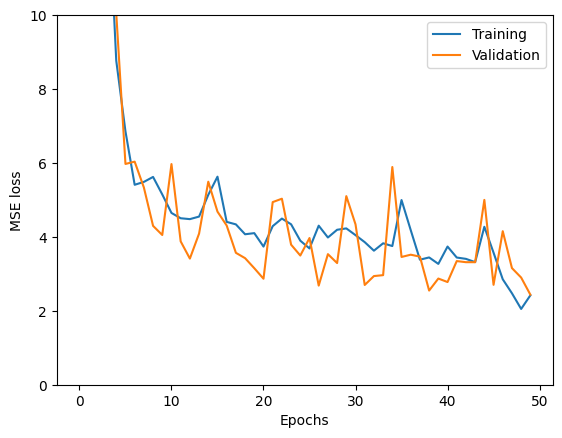

Average loss on test dataset:  1.9444481134414673
[[16.849586  17.       ]
 [14.059564  16.       ]
 [14.603197  15.       ]
 [ 8.73349   10.       ]
 [ 7.7887645  8.       ]]
Tester: Regression model learning OK


In [80]:
# implement your solution BELOW

# train
epochs = 50
loss_fn = nn.MSELoss()
lr = 0.055
optimizer = torch.optim.Adam(reg_model.parameters(), lr=lr)

train_losses = []
val_losses = []

for epoch in range(epochs):
  reg_model.train()
  train_epoch_losses = []

  for x, y in dataloader_reg_train:
    optimizer.zero_grad()
    y_hat = reg_model(x)
    loss = loss_fn(y_hat, y)
    train_epoch_losses.append(loss)
    loss.backward()
    optimizer.step()

  train_epoch_losses = torch.tensor(train_epoch_losses)
  avg_epoch_loss = train_epoch_losses.mean()
  train_losses.append(avg_epoch_loss)

  reg_model.eval()
  val_epoch_losses = []
  for x, y in dataloader_reg_val:
    with torch.no_grad():
      y_hat = reg_model(x)
    loss = loss_fn(y_hat, y)
    val_epoch_losses.append(loss)

  val_epoch_losses = torch.tensor(val_epoch_losses)
  avg_epoch_loss = val_epoch_losses.mean()
  val_losses.append(avg_epoch_loss)
  print(f'Tranining {epoch+1}/{epochs} done, training loss: {train_losses[-1]}, validation loss: {val_losses[-1]}')

# visualize
plt.plot(train_losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE loss')
plt.ylim(0, 10)
plt.legend()
plt.show()

# test
reg_model.eval()
test_losses = []
pred_label_pairs = []
for x, y in dataloader_reg_test:
  with torch.no_grad():
    y_hat = reg_model(x)
  loss = loss_fn(y_hat, y)
  test_losses.append(loss)
  pred_label_pairs.append(torch.concat((y_hat, y), dim=-1))

test_mse = torch.tensor(test_losses).mean()
print('Average loss on test dataset: ', test_mse.item())
print(pred_label_pairs[0].numpy()[:5])

# implement your solution ABOVE

tester.test('reg_model_learning', test_mse)

## **G**: Az adat-iterátorok létrehozása a klasszifikációs feladathoz

Hasonlóan a D) feladathoz, itt is három adat-iterátort kell létrehoznunk, azonban ezúttal egy kissé eltérő feladatot fogunk megtanulni megoldani, így a visszaadott tenzorok alakja / adattípusa is eltérő lesz. **Állítsd elő** a `dataloader_cl_train`, `dataloader_cl_val`, `dataloader_cl_test` nevű **iterátorokat**, melyek ugyancsak a C) részfeladatban elkészült tanító-, validációs- és teszthalmazokat tartalmazó tömböket járják be! A klasszifikációs feladatban input változókként az összes változót felhasználjuk az adatbázisban, kivéve a három harmadév végi jegyét a diákoknak (`G1`, `G2`, `G3` nevű, #30, #31 és #32 indexű oszlopok az eredeti adatbázis szövegfájlban). Címkeként három kategóriát definiálunk és az összes diákot besoroljuk ezekbe a kategóriákba:
- **"Gyengén teljesítő diákok"** kategória, #0 kategóriaindex: azon diákok kerülnek ide, akik átlagos jegye kisebb, mint 9.5.
- **"Közepesen teljesítő diákok"** kategória, #1 kategóriaindex: azon diákok kerülnek ide, akik legnagyobb jegye kisebb, mint 14, de nem tartoznak a "Gyengén teljesítő diákok" közé.
- **"Jól teljesítő diákok"** kategória, #2 kategóriaindex: azon diákok kerülnek ide, akik nem tartoznak a másik két kategóriába.

A fentiek alapján az iterátorok által visszaadott tenzorok alakja `(batch_size, 34)` és `(batch_size,)` lesz. Utóbbi (a címkéket tartalmazó tenzor) a diákok kategóriaindexét fogja tartalmazni (azaz 0, 1, vagy 2 értékeket, `torch.int64` adattípusban), előbbi pedig az adatbázis összes felhasznált változójának értékét a megfelelő mintaelemekre `torch.float32` adattípusban. `batch_size` ezúttal is a mintaelemek számát adja meg, ez kézzel beállítandó.

A **tanító és validációs halmazt felsoroló iterátorok véletlen sorrendben járják be** a hozzájuk tartozó mintaelemeket! A teszt halmazt felsoroló iterátor ne változtasson a `dataset_split_test` tömb sorrendjén!

In [33]:
# implement your solution BELOW

class StudentsClassificationDataset(Dataset):
  def __init__(self, data):
    avg_grades = np.mean(data[:, 30:33], axis=1)
    highest_grades = np.max(data[:, 30:33], axis=1)
    target = np.where(avg_grades < 9.5, 0, np.where(highest_grades < 14, 1, 2))
    features = np.delete(data, [30,31,32], axis=1)
    self.features = torch.tensor(features, dtype=torch.float32)
    self.target = torch.tensor(target, dtype=torch.int64)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.target[idx]

dataset_cl_train = StudentsClassificationDataset(dataset_split_train)
dataset_cl_val = StudentsClassificationDataset(dataset_split_val)
dataset_cl_test = StudentsClassificationDataset(dataset_split_test)

dataloader_cl_train = DataLoader(dataset_cl_train, batch_size=32, shuffle=True)
dataloader_cl_val = DataLoader(dataset_cl_val, batch_size=32, shuffle=True)
dataloader_cl_test = DataLoader(dataset_cl_test, batch_size=32, shuffle=False)

# implement your solution ABOVE

tester.test('cl_iter', dataloader_cl_train, dataloader_cl_val, dataloader_cl_test)

Tester: Dataset iterators for classification task OK


## **H**: A klasszifikációs neuronháló definiálása

**Definiáld a klasszifikációs feladathoz alkalmazandó neuronhálót megvalósító osztályt**, mely a regressziós neuronhálót implementáló osztályhoz hasonlóan, az általános `torch.nn.Module` osztály leszármazottja! Példányosítsd az új osztályt és add értékül a `cl_model` nevű változónak a példányt!

A klasszifikációs neuronháló **tartalmazzon 3 teljesen összekötött réteget! Az első kettő réteg tartalmazzon egyenként 30 és 20 neuront és alkalmazza a ReLU aktivációs függvényt a rétegek után!** Az utolsó réteget a háromkategóriás klasszifikációnak megfelelően kell kialakítani! Lásd a "HF1 GYIK" fórumot!

In [121]:
# implement your solution BELOW

class ClassificationModel(nn.Module):
  def __init__(self, input_dim, n_class):
    super().__init__()
    self.linear_relu_layers = nn.Sequential(
        nn.Linear(input_dim, 30),
        nn.ReLU(),
        nn.Linear(30, 20),
        nn.ReLU(),
        nn.Linear(20, n_class)
    )

  def forward(self, x):
    return self.linear_relu_layers(x)

cl_model = ClassificationModel(34, 3)

# implement your solution ABOVE

tester.test('cl_model_architecture', cl_model)

Tester: Classification model architecture OK


## **I**: A háló betanítása (multi-class) klasszifikációs feladatra

**Tanítsd be a** `cl_model` **neuronhálót** a tanítóhalmazon a `dataloader_cl_train` iterátor segítségével és alkalmazd a `dataloader_cl_val` iterátort a validációhoz!

Alkalmazd a multi-class klasszifikációkor szokásosan használt **cross-entropy költséget**! **Mérd le minden epoch-ban a tanító- és a validációs halmazon mért költségeket, majd a tanítás végeztével rajzold ki ezeknek az értékeknek a tanítás során való alakulását egy közös grafikonon!** A grafikonon a jelmagyarázat meglétére és a görbék könnyű elkülöníthetőségére figyelj ezúttal is!

A tanítást ezúttal az **early stopping** technika állítsa le! Amennyiben adott számú epoch-on keresztül (`patience`) nem javul a validációs költség, érjen véget a betanítás és **állítsuk vissza a `cl_model` súlyait abból az epoch-ból, amikor a legjobb volt a validációs költség!** Mindez automatikusan történjen!

A betanítás végeztével **mérd le az átlagos költséget a teljes teszthalmazon** és add értékül a kapott számot a `test_ce` változónak!

**Számold ki az _accuracy_ (pontosság) metrikát is a teszthalmaz elemein** és add értékül a kapott számot a `test_acc` változónak! Az _accuracy_ metrika a helyesen klasszifikált mintaelemek arányát adja meg. Például, ha 150 mintaelem kategóriájának becslésekor 75 esetben találtuk el a helyes kategóriát, az _accuracy_ értéke 0.5 lesz.

Ezt követően, **válassz néhány mintaelemet a teszthalmazból** (például a `dataloader_cl_test` iterátor segítségével) és **adj becslést a címkéjükre** (a kategória indexére) az input változók értékei alapján, majd **írasd ki az egyes mintaelemekre a becsült és az igazi címkéjüket** (a kategóriák indexét)! Így példákon is láthatjuk, hogy mennyire ad jó becsléseket a neuronhálónk.

Végezetül, **számold ki a háló teszthalmazon vett konfúziós mátrixát és rajzold ki azt**! A konfúziós mátrix egy k x k méretű mátrix k kategória esetén, ahol az `[i,j]` indexű elem megadja, hogy az adathalmazon a modellünk hány `i` kategóriába tartozó mintaelemet becsült a `j` kategóriába. A modellünk jó teljesítményét jelzi, ha minél több elem kerül a konfúziós mátrix főátlójába. A számoláshoz felhasználhatsz külső könyvtárat is, de NumPy-ban is megoldható. A kirajzoláshoz használható például a `matplotlib.pyplot` csomag `imshow` függvénye. Figyelj rá, hogy a grafikonon világosan látszon, hogy melyik tengely sorolja fel az igazi kategóriákat és melyik a becsült kategóriákat, látszanak a sorok és oszlopok végén a kategóriák indexei és a cellákban az odatartozó mintaelemek darabszáma!


Tranining 1/50 done, training loss: 1.8539714813232422, validation loss: 1.1147223711013794
Tranining 2/50 done, training loss: 1.1360197067260742, validation loss: 1.1666213274002075
Tranining 3/50 done, training loss: 1.1159340143203735, validation loss: 1.0851258039474487
Tranining 4/50 done, training loss: 1.1017755270004272, validation loss: 1.0985426902770996
Tranining 5/50 done, training loss: 1.096714735031128, validation loss: 1.1066184043884277
Tranining 6/50 done, training loss: 1.099339485168457, validation loss: 1.110120415687561
Tranining 7/50 done, training loss: 1.0960296392440796, validation loss: 1.0899028778076172
Tranining 8/50 done, training loss: 1.0953716039657593, validation loss: 1.0869572162628174
Tranining 9/50 done, training loss: 1.0950113534927368, validation loss: 1.1027203798294067
Tranining 10/50 done, training loss: 1.0896791219711304, validation loss: 1.0610476732254028
Tranining 11/50 done, training loss: 1.0777543783187866, validation loss: 1.100682

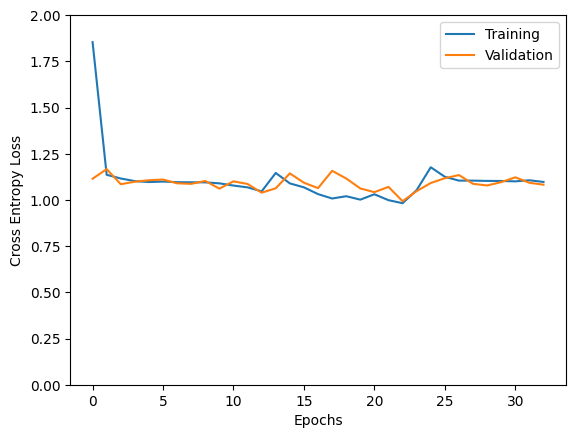

Average accuracy on test dataset:  0.4556961953639984
Average loss on test dataset:  1.0290637016296387
[[0 2]
 [1 2]
 [0 2]
 [1 0]
 [0 0]]


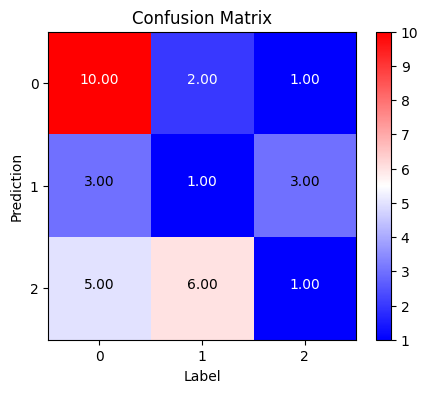

Tester: Classification model learning OK


In [122]:
# implement your solution BELOW

# variables
epochs = 50
loss_fn = nn.CrossEntropyLoss()
lr = 0.1
optimizer = torch.optim.Adam(cl_model.parameters(), lr=lr)

# train method
def train(model, train_dataloader, val_dataloader, optimizer, loss_fn, epochs=10, delta=0.01, patience=10):
  train_losses = []
  val_losses = []

  best_loss = np.inf
  no_improvement_count = 0

  for epoch in range(epochs):
    model.train()
    train_epoch_losses = []

    for x, y in train_dataloader:
      optimizer.zero_grad()
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      train_epoch_losses.append(loss)
      loss.backward()
      optimizer.step()

    train_epoch_losses = torch.tensor(train_epoch_losses)
    avg_epoch_loss = train_epoch_losses.mean()
    train_losses.append(avg_epoch_loss)

    model.eval()
    val_epoch_losses = []

    for x, y in val_dataloader:
      with torch.no_grad():
        y_hat = model(x)

      loss = loss_fn(y_hat, y)
      val_epoch_losses.append(loss)

    val_epoch_losses = torch.tensor(val_epoch_losses)
    avg_epoch_loss = val_epoch_losses.mean()
    val_losses.append(avg_epoch_loss)

    if avg_epoch_loss + delta < best_loss:
      best_loss = avg_epoch_loss
      no_improvement_count = 0
      torch.save(model.state_dict(), 'best_model.pth')
    else:
      no_improvement_count += 1

    print(f'Tranining {epoch+1}/{epochs} done, training loss: {train_losses[-1]}, validation loss: {val_losses[-1]}')

    if no_improvement_count >= patience:
      print('Stopped by early stopping.')
      print('Best validation loss: ', best_loss.item())
      model.load_state_dict(torch.load('best_model.pth'))
      return train_losses, val_losses

  return train_losses, val_losses

# training and visualization
train_losses, val_losses = train(cl_model, dataloader_cl_train, dataloader_cl_val, optimizer, loss_fn, epochs=epochs, delta=0.005, patience=10)

plt.plot(train_losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.ylim(0, 2)
plt.legend()
plt.show()

# accuracy, loss and label prediction on test set
cl_model.eval()
accuracy = []
test_losses = []
pred_label_pairs = []
for x, y in dataloader_cl_test:
  with torch.no_grad():
    y_hat = cl_model(x)
  prediction = torch.argmax(y_hat, dim=1)
  loss = loss_fn(y_hat, y)
  test_losses.append(loss)
  accuracy.append((prediction == y).to(torch.float32))
  pred_label_pairs.append(torch.stack((prediction, y), dim=-1))

test_ce = torch.tensor(test_losses).mean()
test_acc = torch.cat(accuracy).mean()
print('Average accuracy on test dataset: ', test_acc.item())
print('Average loss on test dataset: ', test_ce.item())
print(pred_label_pairs[0].numpy()[:5])

# confusion matrix
pred_label_pairs = pred_label_pairs[0].numpy()
confusion_matrix = np.bincount(pred_label_pairs[:, 1] * 3 + pred_label_pairs[:, 0], minlength = 9).reshape(3,3)
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
plt.xlabel('Label')
plt.xticks([0,1,2])
plt.ylabel('Prediction')
plt.yticks([0,1,2])
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
      color = "black" if 2.5 <= confusion_matrix[i, j] <= 7.5 else "white"
      plt.text(j, i, format(confusion_matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color=color)
plt.imshow(confusion_matrix, cmap='bwr')
plt.colorbar()
plt.show()

# implement your solution ABOVE

tester.test('cl_model_learning', test_ce, test_acc)